# Exercise 4.9:- Intro to Data visualization with Python - Trial
In this Notebook the following steps have been executed
1. Bar chart creation for the 'order_day_of_week'
2. Histogram for prices column
3. Line chart between order_dow and Prices - To visualize the development for the characteristics over time.

# Import the Libraries

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import the merged dataframe from the last exercise 

In [2]:
path = r'C:\Users\sorna\Desktop\Data Analysis\Achievement 4'

In [3]:
df_ords_prods_merge1 = pd.read_pickle(os.path.join(path, '02.Data', 'Prepared Data', 'orders_products_flags.pkl'))

In [4]:
df_ords_prods_merge1.columns

Index(['Unnamed: 0', 'product_id', 'product_name', 'aisle_id', 'department_id',
       'prices', 'order_id', 'user_id', 'eval_set', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'price_range_loc',
       'busiest_day', 'Busiest days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_price', 'Spending_flag', 'order_freq_median',
       'order_freq_flag'],
      dtype='object')

# 01 . Bar chart Creation
This bar chart shows the number of orders recieved during the different days of the week. 

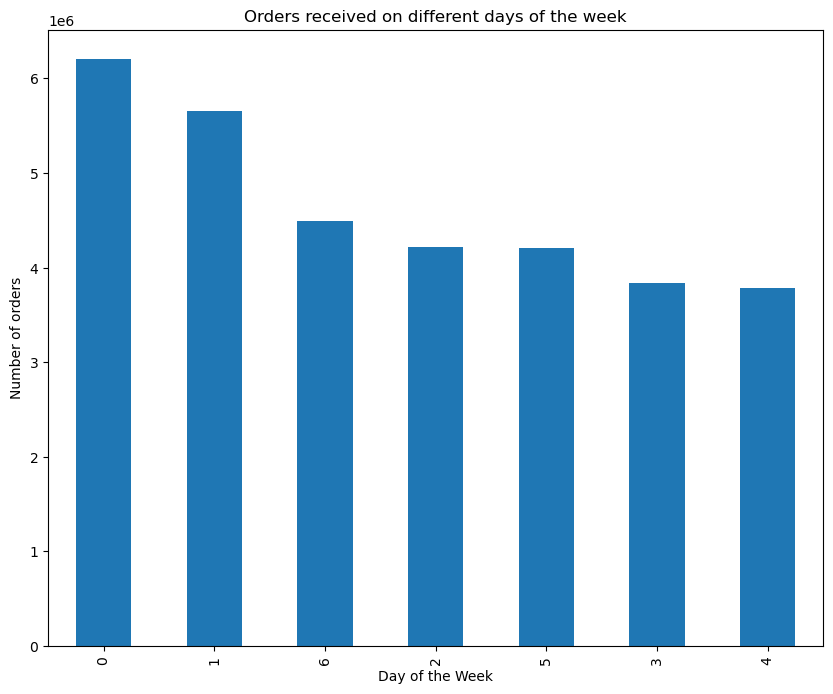

In [8]:
df_ords_prods_merge1['order_dow'].value_counts().plot(
    kind = 'bar',
    figsize=(10,8),
    title='Orders received on different days of the week'
)

plt.xlabel('Day of the Week')
plt.ylabel('Number of orders')
plt.show()

# The values in the x-axis is sorted based on the values. To avoid this , we can use the sort_index function

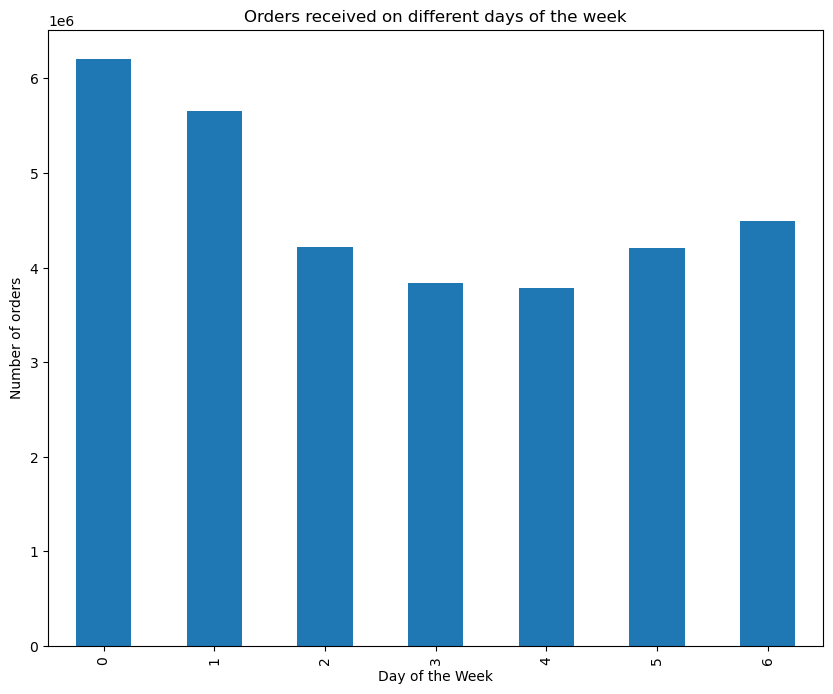

In [9]:
df_ords_prods_merge1['order_dow'].value_counts().sort_index().plot(
    kind = 'bar',
    figsize=(10,8),
    title='Orders received on different days of the week'
)

plt.xlabel('Day of the Week')
plt.ylabel('Number of orders')
plt.show()

# 02. Exporting the visualisation to the local storage

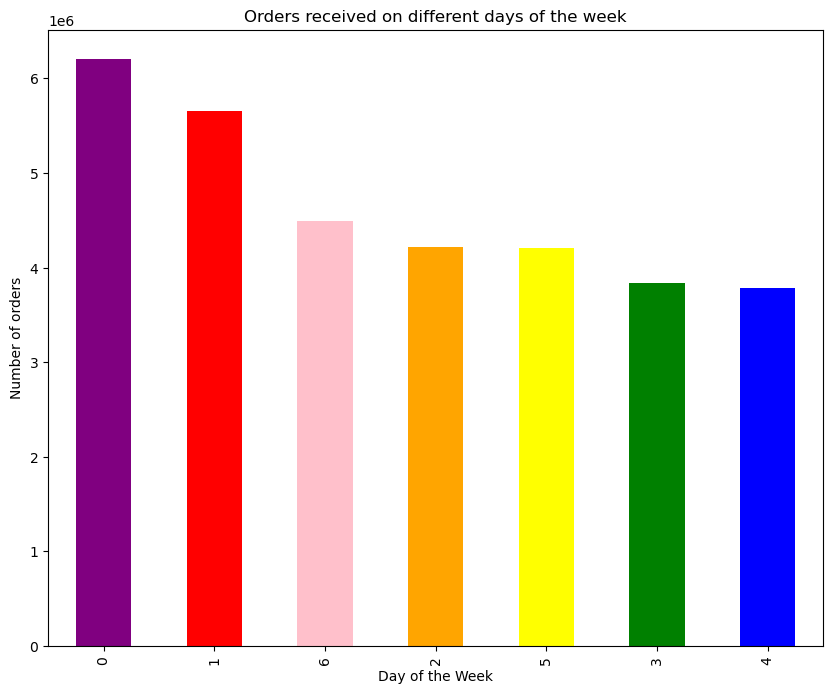

In [12]:
bar = df_ords_prods_merge1['order_dow'].value_counts().plot(
    kind = 'bar',
    figsize=(10,8),
    color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'],
    title='Orders received on different days of the week'
)

plt.xlabel('Day of the Week')
plt.ylabel('Number of orders')
plt.show()

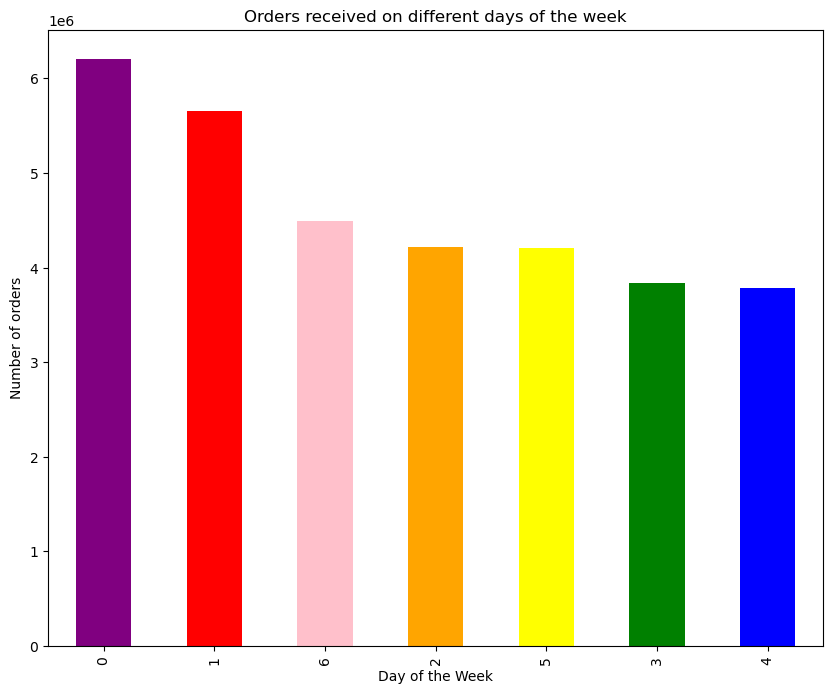

In [13]:
bar.figure

# Exporting the visualisation saved to bar outside of Jupyter can be done using figure.savefig() function

In [14]:
bar.figure.savefig(os.path.join(path, '04.Analysis','Visualizations', 'bar_orders_dow.png'))

# 03. Creating Histograms and Scatterplots

# Scatterplots for prices column inorder to perform the exploratory analysis. We have plotted the prices column against itself to visualise the distribution and check for outliers.

Text(0.5, 1.0, 'Distribution of Prices')

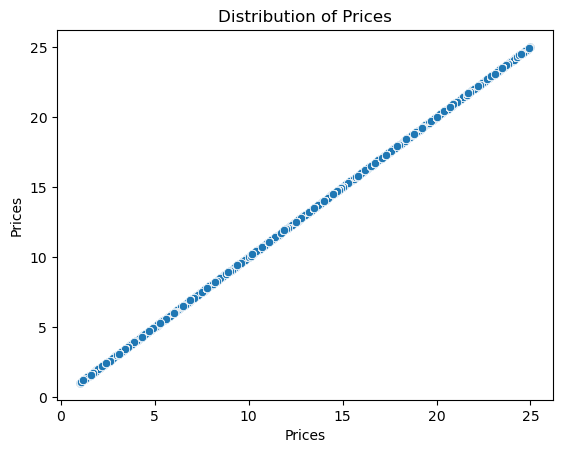

In [16]:
scatter1 = sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge1)

plt.xlabel('Prices')
plt.ylabel('Prices')
plt.title('Distribution of Prices')


In [17]:
scatter1.figure.savefig(os.path.join(path, '04.Analysis','Visualizations', 'scatter_plot_prices.png'))

<Axes: ylabel='Frequency'>

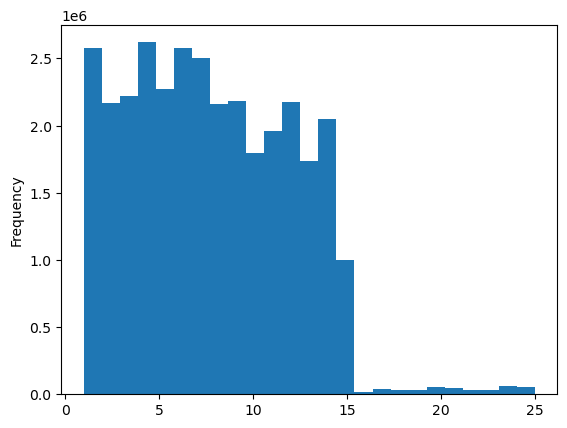

In [39]:
df_ords_prods_merge1['prices'].plot.hist(bins = 25)

Text(0.5, 1.0, 'Histogram for the price of the Products')

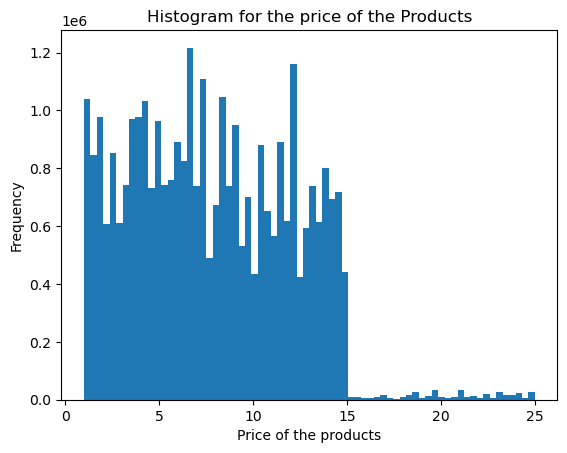

In [18]:
hist = df_ords_prods_merge1['prices'].plot.hist(bins = 70, title = 'Histogram for the prices')
plt.xlabel('Price of the products')
plt.ylabel('Frequency')
plt.title('Histogram for the price of the Products')

# Export the histogram to the local folder

In [19]:
hist.figure.savefig(os.path.join(path, '04.Analysis','Visualizations', 'hist_prices.png'))

# Creating line charts - Used to visualize the development of a characteristics over time.

In [20]:
#Sampling the dataset to create the line chart for price vs order_dow
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merge1)) <= 0.7

In [21]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [22]:
df_ords_prods_merge1.shape

(32404859, 26)

In [23]:
big = df_ords_prods_merge1[dev]
small = df_ords_prods_merge1[~dev]

In [24]:
len(df_ords_prods_merge1)

32404859

In [25]:
len(big) + len(small)

32404859

In [26]:
len(dev)

32404859

In [27]:
df_2 = small[['order_dow','prices']]

In [28]:
df_2

,order_dow,prices
0,6,5.8
2,0,5.8
3,3,5.8
6,2,5.8
10,5,5.8
...,...,...
32404841,6,13.5
32404842,6,13.5
32404843,5,13.5
32404849,6,13.5


# Create the line chart now for the above Dataframe.

Text(0.5, 1.0, 'Sales over the whole week')

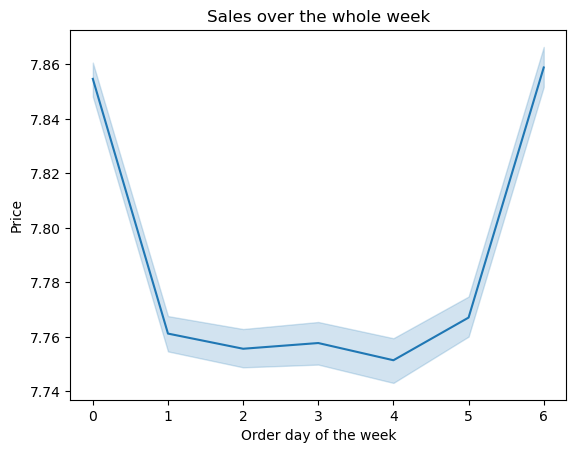

In [29]:
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')
plt.xlabel('Order day of the week')
plt.ylabel('Price')
plt.title('Sales over the whole week')

# Export the line chart to the local folder

In [30]:
line.figure.savefig(os.path.join(path, '04.Analysis','Visualizations', 'line_prices.png'))